In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("nlp with disaster/train.csv")
dfx = pd.read_csv("nlp with disaster/test.csv")

In [4]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5080 entries, 31 to 7581
Data columns (total 5 columns):
id          5080 non-null int64
keyword     5080 non-null object
location    5080 non-null object
text        5080 non-null object
target      5080 non-null int64
dtypes: int64(2), object(3)
memory usage: 238.1+ KB


In [7]:
dfx.dropna(inplace = True)
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2158 entries, 15 to 3250
Data columns (total 4 columns):
id          2158 non-null int64
keyword     2158 non-null object
location    2158 non-null object
text        2158 non-null object
dtypes: int64(1), object(3)
memory usage: 84.3+ KB


In [64]:
x = np.array(df)
x_train = x[:,:4]
y_train = x[:,-1]

In [65]:
xtest = np.array(dfx)
x_test = xtest[:,:4]
y_test = xtest[:,-1]

In [66]:
x_train[:20,:]
y_train[:20]

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1],
      dtype=object)

In [67]:
print(x_train.shape,y_train.shape)

(5080, 4) (5080,)


In [68]:
print(x_test.shape,y_test.shape)

(2158, 4) (2158,)


In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
le = LabelEncoder()
x_train[:,1] = le.fit_transform(x_train[:,1])
x_train[:,2] = le.fit_transform(x_train[:,2])
x_test[:,1] = le.fit_transform(x_test[:,1])
x_test[:,2] = le.fit_transform(x_test[:,2])

In [71]:
x_train[:20,:]

array([[48, 0, 453,
        '@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C'],
       [49, 0, 922,
        'We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw'],
       [50, 0, 209,
        '#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi'],
       [52, 0, 2054, 'Crying out for more! Set me ablaze'],
       [53, 0, 1516,
        'On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N'],
       [54, 0, 2114,
        "@PhDSquares #mufc they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season."],
       [55, 0, 2864,
        'INEC Office in Abia Set Ablaze - http://t.co/3ImaomknnA'],
       [57, 0, 2020, 'Ablaze for you Lord :D'],
       [59, 0, 1493,
        'Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw'],
       [62, 0, 3117,
        'Had an awesome time visiting the CFC head office the anc

In [72]:
review = x_train[:,3]
test_review = x_test[:,3]

In [73]:
review

array(['@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C',
       'We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw',
       '#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi',
       ...,
       "Three days off from work and they've pretty much all been wrecked hahaha shoutout to my family for that one",
       "#FX #forex #trading Cramer: Iger's 3 words that wrecked Disney's stock http://t.co/7enNulLKzM",
       '@engineshed Great atmosphere at the British Lion gig tonight. Hearing is wrecked. http://t.co/oMNBAtJEAO'],
      dtype=object)

In [74]:
review.shape

(5080,)

In [75]:
test_review

array(["Birmingham Wholesale Market is ablaze BBC News - Fire breaks out at Birmingham's Wholesale Market http://t.co/irWqCEZWEU",
       '@sunkxssedharry will you wear shorts for race ablaze ?',
       '#PreviouslyOnDoyinTv: Toke Makinwa\x89Ûªs marriage crisis sets Nigerian Twitter ablaze... http://t.co/CMghxBa2XI',
       ...,
       'Smackdown tyme this should put me in a good mood again since it got wrecked smh',
       "@thrillhho jsyk I haven't stopped thinking abt remus slumped against the bathroom door all day I was wrecked ??????????",
       '@stighefootball Begovic has been garbage. He got wrecked by a Red Bull reserve team and everyone else this preseason'],
      dtype=object)

In [76]:
test_review.shape

(2158,)

# Steps to Preprocess Textual data
- Tokenization
- Removal of Punctuations
- StopWord Removal
- Stemming/Lemmatization

## Tokenization & Stopword removal

In [77]:
from nltk.tokenize import sent_tokenize,word_tokenize

In [78]:
words = word_tokenize(review[0])

In [79]:
print(words)

['@', 'bbcmtd', 'Wholesale', 'Markets', 'ablaze', 'http', ':', '//t.co/lHYXEOHY6C']


In [80]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [81]:
token = RegexpTokenizer('[a-zA-Z]+')

In [82]:
useful_words = token.tokenize(review[0])

In [83]:
useful_words

['bbcmtd',
 'Wholesale',
 'Markets',
 'ablaze',
 'http',
 't',
 'co',
 'lHYXEOHY',
 'C']

In [84]:
sw = set(stopwords.words('english'))

In [85]:
sw = list(sw)

In [86]:
sw

['mightn',
 'more',
 'ours',
 'below',
 'am',
 'her',
 'out',
 'each',
 'over',
 'through',
 'no',
 'been',
 'our',
 'there',
 'has',
 "wouldn't",
 'of',
 'above',
 "shan't",
 'which',
 'doing',
 'into',
 "should've",
 'these',
 "weren't",
 'because',
 'so',
 'my',
 'such',
 'me',
 "that'll",
 'nor',
 'couldn',
 'they',
 'by',
 "hasn't",
 'for',
 'we',
 'myself',
 'him',
 'were',
 'here',
 'isn',
 'most',
 'own',
 's',
 'some',
 'themselves',
 'those',
 'd',
 'an',
 'aren',
 'to',
 've',
 "wasn't",
 'won',
 'why',
 'yourselves',
 'between',
 'a',
 'its',
 "mightn't",
 'wouldn',
 'itself',
 "you're",
 "you'd",
 'before',
 'other',
 'll',
 'hers',
 'can',
 'your',
 'after',
 're',
 "hadn't",
 'hasn',
 "needn't",
 'and',
 'y',
 "mustn't",
 'under',
 'this',
 "you've",
 'now',
 'yourself',
 "haven't",
 'further',
 'didn',
 'their',
 'do',
 'where',
 'both',
 'have',
 'ourselves',
 'should',
 'he',
 'on',
 'ain',
 "doesn't",
 'at',
 'himself',
 "it's",
 'all',
 'not',
 'shouldn',
 'being',


In [87]:
def stopwordsRemoval(tokenised_review):
    new_review = [words for words in tokenised_review if words not in sw]
    return new_review

In [88]:
def tokenizeData(review):
    review = review.lower()
    words = token.tokenize(review)
    useful_words = stopwordsRemoval(words)
    return useful_words

In [89]:
clean_data = [tokenizeData(review[i]) for i in range(len(review))]

In [90]:
clean_data

[['bbcmtd', 'wholesale', 'markets', 'ablaze', 'http', 'co', 'lhyxeohy', 'c'],
 ['always',
  'try',
  'bring',
  'heavy',
  'metal',
  'rt',
  'http',
  'co',
  'yao',
  'e',
  'xngw'],
 ['africanbaze',
  'breaking',
  'news',
  'nigeria',
  'flag',
  'set',
  'ablaze',
  'aba',
  'http',
  'co',
  'nndbgwyei'],
 ['crying', 'set', 'ablaze'],
 ['plus',
  'side',
  'look',
  'sky',
  'last',
  'night',
  'ablaze',
  'http',
  'co',
  'qqsmshaj',
  'n'],
 ['phdsquares',
  'mufc',
  'built',
  'much',
  'hype',
  'around',
  'new',
  'acquisitions',
  'doubt',
  'set',
  'epl',
  'ablaze',
  'season'],
 ['inec', 'office', 'abia', 'set', 'ablaze', 'http', 'co', 'imaomknna'],
 ['ablaze', 'lord'],
 ['check',
  'http',
  'co',
  'roi',
  'nsmejj',
  'http',
  'co',
  'tj',
  'zjin',
  'http',
  'co',
  'yduixefipe',
  'http',
  'co',
  'lxtjc',
  'kls',
  'nsfw'],
 ['awesome',
  'time',
  'visiting',
  'cfc',
  'head',
  'office',
  'ancop',
  'site',
  'ablaze',
  'thanks',
  'tita',
  'vida',

In [91]:
from sklearn.feature_extraction.text import CountVectorizer

In [92]:
cv = CountVectorizer(tokenizer = tokenizeData)

In [93]:
vectorized_corpus = cv.fit_transform(review)

In [94]:
vec_test_corpus = cv.fit_transform(test_review).toarray()

In [95]:
vectorized_corpus = vectorized_corpus.toarray()

In [96]:
vectorized_corpus[0,8167]

0

In [97]:
vectorized_corpus.shape

(5080, 16768)

In [98]:
cv.vocabulary_

{'birmingham': 776,
 'wholesale': 8955,
 'market': 4896,
 'ablaze': 21,
 'bbc': 639,
 'news': 5443,
 'fire': 2791,
 'breaks': 952,
 'http': 3661,
 'co': 1443,
 'irwqcezweu': 3972,
 'sunkxssedharry': 7803,
 'wear': 8874,
 'shorts': 7305,
 'race': 6538,
 'previouslyondoyintv': 6282,
 'toke': 8171,
 'makinwa': 4845,
 'marriage': 4904,
 'crisis': 1705,
 'sets': 7209,
 'nigerian': 5476,
 'twitter': 8391,
 'cmghxba': 1433,
 'xi': 9173,
 'check': 1304,
 'roi': 6907,
 'nsmejj': 5574,
 'tj': 8147,
 'zjin': 9414,
 'yduixefipe': 9251,
 'lxtjc': 4801,
 'kls': 4353,
 'nsfw': 5569,
 'psa': 6367,
 'splitting': 7593,
 'personalities': 6010,
 'techies': 7960,
 'follow': 2870,
 'burners': 1042,
 'beware': 722,
 'world': 9064,
 'sierra': 7340,
 'leone': 4564,
 'amp': 279,
 'guap': 3277,
 'burning': 1044,
 'man': 4855,
 'turban': 8363,
 'diva': 2081,
 'hodwosamws': 3572,
 'via': 8665,
 'etsy': 2513,
 'diss': 2074,
 'song': 7511,
 'people': 5992,
 'take': 7898,
 'thing': 8069,
 'run': 6980,
 'smh': 7456,
 

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [100]:
tfidf = TfidfVectorizer(tokenizer = tokenizeData,ngram_range = (1,1))
vectorized_corpus2 = tfidf.fit_transform(review).toarray()

In [101]:
vectorized_corpus2.shape

(5080, 16768)

In [102]:
vectorized_corpus2[5]

array([0., 0., 0., ..., 0., 0., 0.])

In [103]:
x_new = np.zeros((5080,2))
x_new[:,0] = x_train[:,0]
x_new[:,1] = x_train[:,1]

In [104]:
x_new

array([[   48.,     0.],
       [   49.,     0.],
       [   50.,     0.],
       ...,
       [10831.,   220.],
       [10832.,   220.],
       [10833.,   220.]])

In [105]:
x_train.shape

(5080, 4)

In [106]:
x_train = x_train[:,:3]

In [107]:
x_train

array([[48, 0, 453],
       [49, 0, 922],
       [50, 0, 209],
       ...,
       [10831, 220, 2703],
       [10832, 220, 1507],
       [10833, 220, 1483]], dtype=object)

In [108]:
review

array(['@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C',
       'We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw',
       '#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi',
       ...,
       "Three days off from work and they've pretty much all been wrecked hahaha shoutout to my family for that one",
       "#FX #forex #trading Cramer: Iger's 3 words that wrecked Disney's stock http://t.co/7enNulLKzM",
       '@engineshed Great atmosphere at the British Lion gig tonight. Hearing is wrecked. http://t.co/oMNBAtJEAO'],
      dtype=object)

In [109]:
x_train = np.append(x_train,vectorized_corpus,axis =1)

In [110]:
x_train.shape

(5080, 16771)

In [111]:
x_test = x_test[:,:3]
x_test = np.append(x_test,vec_test_corpus,axis = 1)

In [112]:
x_test[0]

array([46, 0, 697, ..., 0, 0, 0], dtype=object)

In [113]:
x_test.shape

(2158, 9485)

## Creating a Model for Training

In [114]:
from keras.models import Sequential
from keras.layers import *

Using TensorFlow backend.


In [129]:
model = Sequential()
model.add(Dense(64,activation = 'relu',input_shape = (16771,)))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [130]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy',metrics = ['accuracy'])

In [131]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                1073408   
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 1,073,937
Trainable params: 1,073,937
Non-trainable params: 0
_________________________________________________________________


In [132]:
hist1 = model.fit(x_train,y_train,batch_size = 600,epochs = 24,shuffle = True)

Epoch 1/24
5080/5080 [==============================] - 7s 1ms/step - loss: 3.8631 - accuracy: 0.5039
Epoch 2/24
5080/5080 [==============================] - 7s 1ms/step - loss: 0.6885 - accuracy: 0.4862
Epoch 3/24
5080/5080 [==============================] - 7s 1ms/step - loss: 0.6897 - accuracy: 0.5618
Epoch 4/24
5080/5080 [==============================] - 6s 1ms/step - loss: 0.6865 - accuracy: 0.5683
Epoch 5/24
5080/5080 [==============================] - 7s 1ms/step - loss: 0.6878 - accuracy: 0.5717
Epoch 6/24
5080/5080 [==============================] - 7s 1ms/step - loss: 0.6933 - accuracy: 0.5673
Epoch 7/24
5080/5080 [==============================] - 7s 1ms/step - loss: 0.6876 - accuracy: 0.5677
Epoch 8/24
5080/5080 [==============================] - 7s 1ms/step - loss: 0.6916 - accuracy: 0.5677
Epoch 9/24
5080/5080 [==============================] - 7s 1ms/step - loss: 0.6905 - accuracy: 0.5677
Epoch 10/24
5080/5080 [==============================] - 7s 1ms/step - loss: 0.689

## Visualizing Loss and Accuracy

In [133]:
from matplotlib import pyplot as plt

In [134]:
h= hist1.history

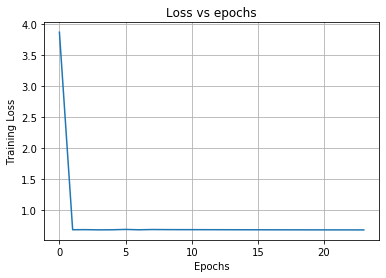

In [135]:
plt.plot(h['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.grid()
plt.title("Loss vs epochs")
plt.show()

In [136]:
x_test.shape

(2158, 9485)

In [137]:

zero = np.zeros((2158,7286))
x_test_new = np.append(x_test,zero,axis = 1)

In [138]:
x_test_new.shape

(2158, 16771)

In [139]:
pred = model.predict(x_test_new)

In [140]:
model.predict?

In [141]:
pred2 = model.predict_classes(x_test_new)

In [142]:
pred

array([[0.45931637],
       [0.45931637],
       [0.45931637],
       ...,
       [0.45931637],
       [0.45931637],
       [0.45931637]], dtype=float32)

In [143]:
pred2

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [149]:
ids = x_test_new[:,0]
ids = ids.reshape((2158,1))

In [150]:
pred2 = pred2.reshape((2158,1))

In [151]:
pred2 = np.append(ids,pred2,axis =1)

In [152]:
pred2

array([[46, 0],
       [47, 0],
       [51, 0],
       ...,
       [10807, 0],
       [10816, 0],
       [10820, 0]], dtype=object)

In [157]:
'''le=LabelEncoder()
y_pred=le.fit_transform(pred2)'''
y_pred=pd.DataFrame(pred2,columns=["id","target"])
y_pred.to_csv("nlp_with_disaster_submit.csv",index=True)